# Sepsis Challenge

Ines Krissaane

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
import glob
from sklearn import linear_model
import datetime
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
from sklearn.model_selection import learning_curve, GridSearchCV
import xgboost as xgb

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import glob
import skimage
import skimage.transform
import skimage.io
import PIL
import numpy as np
import os
from IPython.display import clear_output
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import imageio
import time
import tensorflow

# Analysis of the column SepsisLabel

In [166]:
X_tr = pd.read_csv('sepsis_data_setA.csv')
X_tr.head(100)

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,1,0,1
1,2,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,2,0,1
2,3,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,3,0,1
3,4,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,4,0,1
4,5,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,5,0,1
5,6,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,6,0,1
6,7,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,7,0,1
7,8,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,8,0,1
8,9,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,9,0,1
9,10,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,...,NaN,NaN,83.14,0,NaN,NaN,-0.03,10,0,1


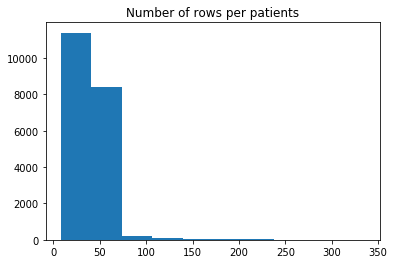

In [7]:
lines = pd.read_csv('lines_per_patients.csv')

plt.hist(lines.Nb);
plt.title('Number of rows per patients');

In [63]:
inf10 = list(lines[lines.Nb<11].ID)
inf20 = list(lines[np.logical_and((lines.Nb<21),(lines.Nb>10))].ID)
inf30 = list(lines[np.logical_and((lines.Nb<31),(lines.Nb>20)) ].ID)
inf40 = list(lines[np.logical_and((lines.Nb<41),(lines.Nb>30))].ID)
inf50 = list(lines[np.logical_and((lines.Nb<51),(lines.Nb>40))].ID)
sup50 = list(lines[lines.Nb>50].ID)

In [64]:
inf10label = []
for i in inf10 :
    inf10label.append(sum(X_tr[X_tr.ID == i].SepsisLabel))

len(inf10)

341

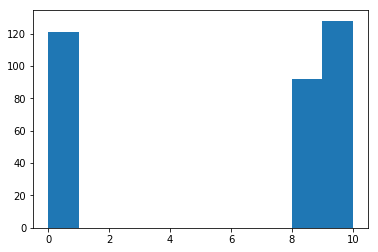

In [65]:
plt.hist(inf10label);

In [66]:
len(sup50)+len(inf10) + len(inf20) + len(inf30)+  len(inf40) + len(inf50)

20336

In [69]:
inf20label = []
for i in inf20 :
    inf20label.append(sum(X_tr[X_tr.ID == i].SepsisLabel))

len(inf20)

2715

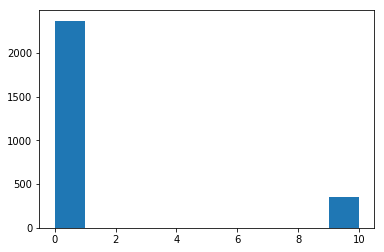

In [70]:
plt.hist(inf20label);

In [71]:
inf30label = []
for i in inf30 :
    inf30label.append(sum(X_tr[X_tr.ID == i].SepsisLabel))

len(inf30)

3810

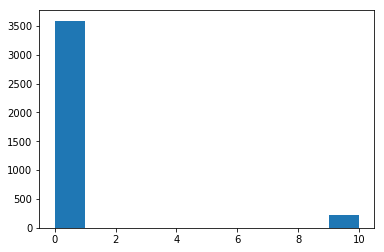

In [72]:
plt.hist(inf30label);

In [73]:
inf40label = []
for i in inf40 :
    inf40label.append(sum(X_tr[X_tr.ID == i].SepsisLabel))

len(inf40)

4525

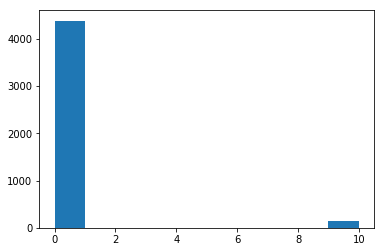

In [74]:
plt.hist(inf40label);

In [75]:
inf50label = []
for i in inf50 :
    inf50label.append(sum(X_tr[X_tr.ID == i].SepsisLabel))

len(inf50)

5397

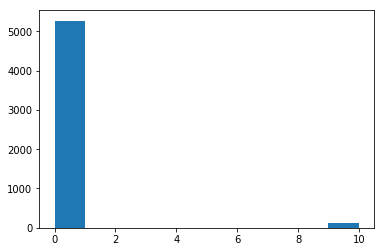

In [76]:
plt.hist(inf50label);

In [77]:
sup50label = []
for i in inf50 :
    sup50label.append(sum(X_tr[X_tr.ID == i].SepsisLabel))

len(sup50)

3548

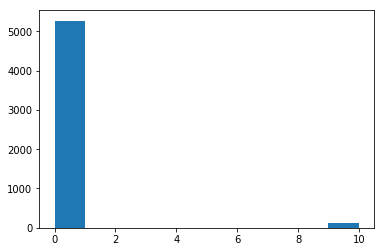

In [78]:
plt.hist(sup50label);

Comment : A max of 10 lines with 1 per patient. 

In [ ]:
# Analysis of the missing values column

In [167]:
# Remove variables with more than 82% of na.
X_tr.drop(['EtCO2', 'Unnamed: 0','Temp','HR','Unit1','Unit2', 'Age', 'Gender'], axis = 1, inplace = True)

In [168]:
X_tr.drop(['Resp','HospAdmTime','O2Sat'], axis = 1, inplace = True)

In [98]:
X_tr[X_tr.ID == 11]

,SBP,MAP,DBP,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,...,Bilirubin_total,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,ICULOS,SepsisLabel,ID
585,NaN,NaN,NaN,0.0,22.5,0.6,7.45,33.0,NaN,NaN,...,NaN,39.5,13.1,NaN,NaN,NaN,NaN,2,0,11
586,136.5,90.0,71.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,11
587,114.0,87.0,61.0,NaN,NaN,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,11
588,114.0,79.0,62.0,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,33.6,12.3,26.3,12.5,NaN,225.0,5,0,11
589,117.0,79.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,11
590,103.0,73.5,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0,11
591,123.0,72.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,11
592,143.0,96.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,11
593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0,11
594,146.0,93.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,11


In [161]:
X_tr[X_tr.ID == 20336]

,SBP,MAP,DBP,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,...,Bilirubin_total,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,ICULOS,SepsisLabel,ID
790182,167.0,135.0,99.0,NaN,NaN,0.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,20336
790183,108.0,82.0,70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,20336
790184,115.0,87.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,20336
790185,176.0,119.5,97.5,-6.0,NaN,NaN,7.16,67.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,20336
790186,187.0,120.5,105.0,0.0,25.0,0.5,7.38,41.0,NaN,117.0,...,0.5,36.0,12.5,26.1,16.1,NaN,367.0,7,0,20336
790187,NaN,85.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,0,20336
790188,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,0,20336
790189,NaN,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,0,20336
790190,NaN,84.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,0,20336
790191,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,0,20336


In [165]:
X_tr[X_tr.ICULOS > 105]

,SBP,MAP,DBP,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,...,Bilirubin_total,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,ICULOS,SepsisLabel,ID
409,141.0,87.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,0,9
410,122.0,76.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107,0,9
411,128.0,84.0,67.0,NaN,NaN,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,108,0,9
412,149.0,88.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109,0,9
413,143.0,88.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110,0,9
414,136.0,82.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111,0,9
415,140.0,84.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112,0,9
416,158.0,93.0,72.0,NaN,NaN,0.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113,0,9
417,128.0,78.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114,0,9
418,112.0,74.0,58.0,-1.0,27.0,0.4,7.34,46.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115,0,9


In [ ]:
X_tr[X_tr.SepsisLabel == 1]

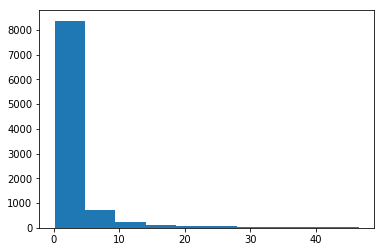

In [108]:
d = X_tr[X_tr.Bilirubin_total > 0]
plt.hist(d.Bilirubin_total);


In [121]:
len(g.ID.unique())

7733

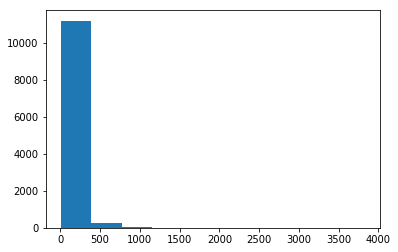

In [111]:
e = X_tr[X_tr.Alkalinephos > 0]
plt.hist(e.Alkalinephos);

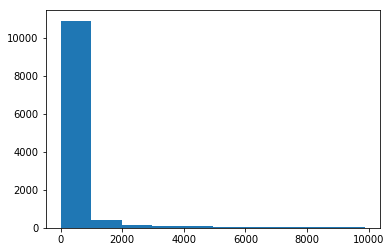

In [119]:
f = X_tr[X_tr.AST > 0]
plt.hist(f.AST);

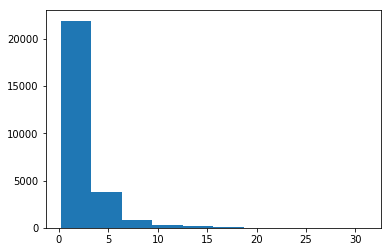

In [120]:
g = X_tr[X_tr.Lactate > 0]
plt.hist(g.Lactate);

In [174]:
h = X_tr[X_tr.PTT > 0]
i = X_tr[X_tr.SaO2 > 0]
j = X_tr[X_tr.Calcium > 0]
k = X_tr[X_tr.Phosphate > 0]
l = X_tr[X_tr.Platelets > 0]
m = X_tr[X_tr.Creatinine > 0]
n = X_tr[X_tr.WBC > 0]
o = X_tr[X_tr.Magnesium > 0]
p = X_tr[X_tr.HCO3 > 0]
q = X_tr[X_tr.BUN > 0]
r = X_tr[X_tr.Chloride > 0]
s = X_tr[X_tr.PaCO2 > 0]
t = X_tr[X_tr.Hgb > 0]
u = X_tr[X_tr.Potassium > 0]
v = X_tr[X_tr.pH > 0]
w = X_tr[X_tr.Hct > 0]
x = X_tr[X_tr.Glucose > 0]
y = X_tr[X_tr.FiO2 > 0]
a = X_tr[X_tr.TroponinI > 0]
b = X_tr[X_tr.Bilirubin_total > 0]


c = X_tr[X_tr.Bilirubin_direct > 0]
ca = X_tr[X_tr.Fibrinogen > 0]


In [176]:
len(ca.ID.unique())

2567

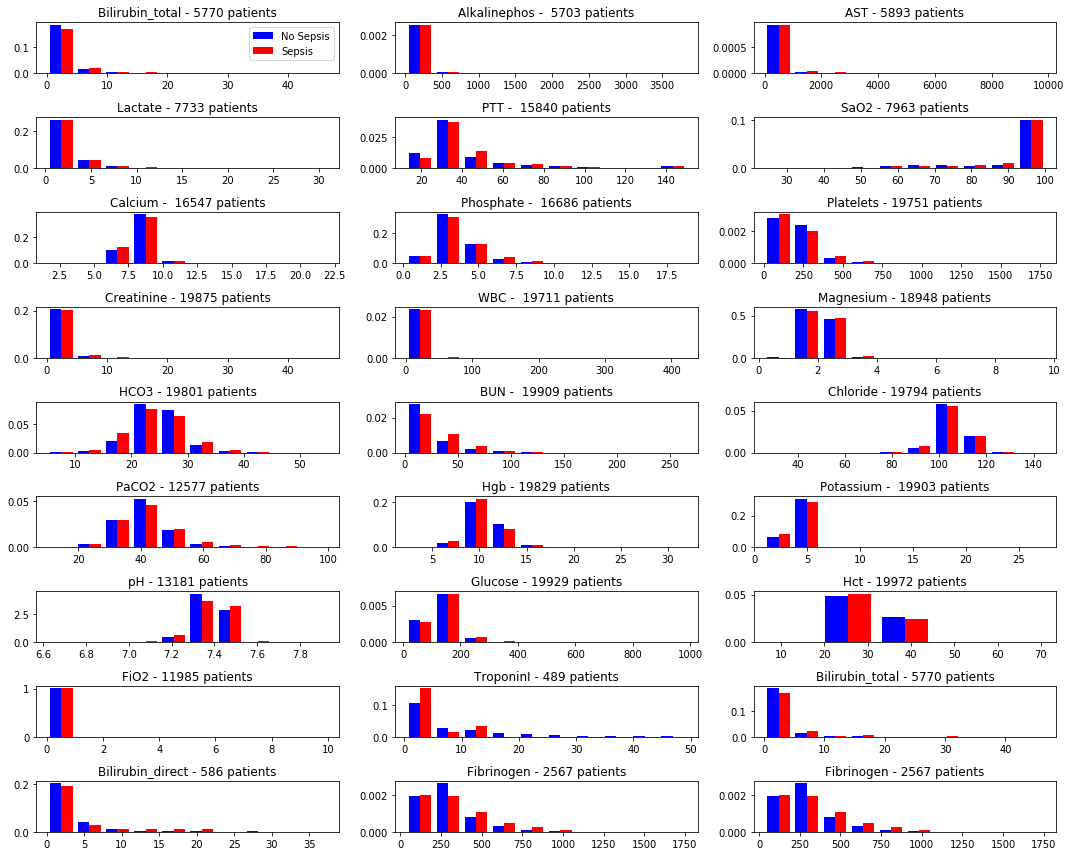

In [178]:
fig, axes = plt.subplots(nrows=9, ncols=3, figsize=(15, 12))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7,ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16,ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24, ax25, ax26= axes.flatten()

colors = ['blue', 'red']
ax0.hist([d[d.SepsisLabel == 0].Bilirubin_total,d[d.SepsisLabel == 1].Bilirubin_total], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax0.set_title('Bilirubin_total - 5770 patients')
ax0.legend(prop={'size': 10})

ax1.hist([e[e.SepsisLabel == 0].Alkalinephos,e[e.SepsisLabel == 1].Alkalinephos], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax1.set_title('Alkalinephos -  5703 patients')

ax2.hist([f[f.SepsisLabel == 0].AST,f[f.SepsisLabel == 1].AST], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax2.set_title('AST - 5893 patients')

ax3.hist([g[g.SepsisLabel == 0].Lactate,g[g.SepsisLabel == 1].Lactate], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax3.set_title('Lactate - 7733 patients')

ax4.hist([h[h.SepsisLabel == 0].PTT,h[h.SepsisLabel == 1].PTT], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax4.set_title('PTT -  15840 patients')

ax5.hist([i[i.SepsisLabel == 0].SaO2,i[i.SepsisLabel == 1].SaO2], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax5.set_title('SaO2 - 7963 patients')

ax6.hist([j[j.SepsisLabel == 0].Calcium,j[j.SepsisLabel == 1].Calcium], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax6.set_title('Calcium -  16547 patients')

ax7.hist([k[k.SepsisLabel == 0].Phosphate,k[k.SepsisLabel == 1].Phosphate], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax7.set_title('Phosphate -  16686 patients')

ax8.hist([l[l.SepsisLabel == 0].Platelets,l[l.SepsisLabel == 1].Platelets], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax8.set_title('Platelets - 19751 patients')

ax9.hist([m[m.SepsisLabel == 0].Creatinine,m[m.SepsisLabel == 1].Creatinine], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax9.set_title('Creatinine - 19875 patients')

ax10.hist([n[n.SepsisLabel == 0].WBC,n[n.SepsisLabel == 1].WBC], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax10.set_title('WBC -  19711 patients')

ax11.hist([o[o.SepsisLabel == 0].Magnesium,o[o.SepsisLabel == 1].Magnesium], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax11.set_title('Magnesium - 18948 patients')

ax12.hist([p[p.SepsisLabel == 0].HCO3,p[p.SepsisLabel == 1].HCO3], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax12.set_title('HCO3 - 19801 patients')

ax13.hist([q[q.SepsisLabel == 0].BUN,q[q.SepsisLabel == 1].BUN], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax13.set_title('BUN -  19909 patients')

ax14.hist([r[r.SepsisLabel == 0].Chloride,r[r.SepsisLabel == 1].Chloride], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax14.set_title('Chloride - 19794 patients')

ax15.hist([s[s.SepsisLabel == 0].PaCO2,s[s.SepsisLabel == 1].PaCO2], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax15.set_title('PaCO2 - 12577 patients')

ax16.hist([t[t.SepsisLabel == 0].Hgb,t[t.SepsisLabel == 1].Hgb], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax16.set_title('Hgb - 19829 patients')

ax17.hist([u[u.SepsisLabel == 0].Potassium,u[u.SepsisLabel == 1].Potassium], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax17.set_title('Potassium -  19903 patients')

ax18.hist([v[v.SepsisLabel == 0].pH,v[v.SepsisLabel == 1].pH], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax18.set_title('pH - 13181 patients')

ax19.hist([x[x.SepsisLabel == 0].Glucose,x[x.SepsisLabel == 1].Glucose], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax19.set_title('Glucose - 19929 patients')

ax20.hist([w[w.SepsisLabel == 0].Hct,w[w.SepsisLabel == 1].Hct], 5, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax20.set_title('Hct - 19972 patients')


ax21.hist([y[y.SepsisLabel == 0].FiO2,y[y.SepsisLabel == 1].FiO2], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax21.set_title('FiO2 - 11985 patients')


ax22.hist([a[a.SepsisLabel == 0].TroponinI,a[a.SepsisLabel == 1].TroponinI], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax22.set_title('TroponinI - 489 patients')


ax23.hist([b[b.SepsisLabel == 0].Bilirubin_total,b[b.SepsisLabel == 1].Bilirubin_total], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax23.set_title('Bilirubin_total - 5770 patients')

ax24.hist([c[c.SepsisLabel == 0].Bilirubin_direct,c[c.SepsisLabel == 1].Bilirubin_direct], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax24.set_title('Bilirubin_direct - 586 patients')

ax25.hist([ca[ca.SepsisLabel == 0].Fibrinogen,ca[ca.SepsisLabel == 1].Fibrinogen], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax25.set_title('Fibrinogen - 2567 patients')

ax26.hist([ca[ca.SepsisLabel == 0].Fibrinogen,ca[ca.SepsisLabel == 1].Fibrinogen], 10, density=True, histtype='bar', color=colors, label=['No Sepsis', 'Sepsis'])
ax26.set_title('Fibrinogen - 2567 patients')


fig.tight_layout()
plt.show()


# Linear Mixed Models

In [218]:
X_tr = pd.read_csv('sepsis_data_setA.csv')


In [219]:
# Remove variables with more than 82% of na.
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' , 'Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Unnamed: 0','Fibrinogen', 'Platelets',
    "Glucose"], axis = 1, inplace = True)

In [220]:
X_tr.drop(['Unit1', "Unit2"], axis = 1, inplace = True)

In [221]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


Considering the formula MAP = (SBP + 2*DBP) / 3 and the correlation between MAP and DBP, SBP.
Let's remove SBP and DBP.

In [222]:
X_tr.drop(["DBP", "SBP"], axis = 1, inplace = True)

Missing values fill in by mean, makes sense because almost all the patients are normal. And you find many missing values only in the variable Temperature Temp. 

In [223]:
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

In [224]:
X_tr.drop(["Age"], axis = 1, inplace = True)

In [225]:
X_tr.head()

,HR,O2Sat,Temp,MAP,Resp,Gender,HospAdmTime,ICULOS,SepsisLabel,ID
0,97.0,95.0,36.11,75.33,19.0,0,-0.03,1,0,1
1,97.0,95.0,36.11,75.33,19.0,0,-0.03,2,0,1
2,89.0,99.0,36.11,86.00,22.0,0,-0.03,3,0,1
3,90.0,95.0,36.11,91.33,30.0,0,-0.03,4,0,1
4,103.0,88.5,36.11,91.33,24.5,0,-0.03,5,0,1


In [227]:
normal = X_tr[X_tr['SepsisLabel'] == 0]
anormal = X_tr[X_tr['SepsisLabel'] == 1]

In [228]:
normal = normal.sample(n=20000)
X_tr = pd.concat([normal, anormal])


In [214]:
data = X_tr

In [215]:
Y_tr = data.SepsisLabel
data.drop(['SepsisLabel'], axis = 1, inplace = True)
X_train, X_test, y_train, y_test = train_test_split(data,Y_tr,test_size=.3, random_state=42)

In [229]:
md = smf.mixedlm("SepsisLabel ~ Resp + Temp + MAP + ICULOS + HR + Resp + HospAdmTime+ Gender + O2Sat  ", X_tr, groups=X_tr["ID"])
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: SepsisLabel
No. Observations: 37136   Method:             REML       
No. Groups:       12814   Scale:              0.0361     
Min. group size:  1       Likelihood:         -2947.9437 
Max. group size:  21      Converged:          Yes        
Mean group size:  2.9                                    
---------------------------------------------------------
              Coef.  Std.Err.    z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept     -0.663    0.082  -8.081 0.000 -0.823 -0.502
Resp           0.002    0.000   5.273 0.000  0.001  0.002
Temp           0.012    0.002   6.299 0.000  0.008  0.015
MAP           -0.000    0.000  -3.686 0.000 -0.001 -0.000
ICULOS         0.007    0.000 141.531 0.000  0.007  0.007
HR             0.001    0.000  12.511 0.000  0.001  0.002
HospAdmTime   -0.000    0.000  -6.431 0.000 -0.000 -0.000
Gender         0.016    

In [230]:
dataB = pd.read_csv('sepsis_data_setB.csv')


In [231]:
dataB.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' , 'Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Unnamed: 0','Fibrinogen', 'Platelets',
    "Glucose", 'Unit1', 'Unit2', "DBP", "SBP", 'Age'], axis = 1, inplace = True)

In [232]:
dataB.head()

,HR,O2Sat,Temp,MAP,Resp,Gender,HospAdmTime,ICULOS,SepsisLabel,ID
0,NaN,NaN,NaN,NaN,NaN,1,-214.64,1,0,1
1,93.0,92.5,NaN,76.0,22.0,1,-214.64,2,0,1
2,91.0,96.0,NaN,84.5,23.5,1,-214.64,3,0,1
3,93.0,98.0,NaN,87.0,21.0,1,-214.64,4,0,1
4,93.0,95.0,NaN,81.0,20.0,1,-214.64,5,0,1


In [233]:
dataB.fillna(method='bfill', inplace=True)
dataB.fillna(method='ffill', inplace=True)

In [ ]:
md.predict(dataB)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train);

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
predictions

In [ ]:
feature_list = list(X_train.columns)

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

In [ ]:
def code(file) :
    data = pd.read_csv(file , sep='|')
    data.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' ,'Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Fibrinogen', 'Platelets',
    "Unit1", 'Unit2', "Glucose",'DBP','SBP'], axis = 1, inplace = True)
    data.fillna(method='bfill', inplace=True)
    data.fillna(method='ffill', inplace=True)
    Y_te = data.SepsisLabel
    data.drop(['SepsisLabel'], axis = 1, inplace = True)
    col = data.columns
    if sum(pd.isna(data['MAP'])) !=0 : 
        data['MAP'] =  [87] * len(data['MAP'] )
    if sum(pd.isna(data['Temp'])) !=0 : 
        data['Temp'] =  [36.7] * len(data['Temp'] )
    if sum(pd.isna(data['HR'])) !=0 : 
        data['HR'] =  [83.9] * len(data['HR'] )
    if sum(pd.isna(data['O2Sat'])) !=0  :
        data['O2Sat'] =  [97.18] * len(data['O2Sat'] ) 
    if sum(pd.isna(data['Resp'])) !=0  :
        data['Resp'] =  [19.5] * len(data['Resp'] ) 
        

    return(data, Y_te)       

In [ ]:
utility = []
optimal = []
acc=[]
nopred=[]

for file in glob.glob("training_setB/*.psv"):  
    Y_te = code(file)[1]
    X_te = code(file)[0]
    
   
    probabilities = rf.predict(X_te)
    

    predictions = [] 
    for i in range (len(probabilities)):
        if probabilities[i] < 0.6 :   # 1 0.35
            predictions.append(0)
        else :
            predictions.append(1)


    labels = Y_te
    fake = []
    for i in labels :
        fake.append(1-i)
    
        
    n = len(labels)
    
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    cohort_labels.append(labels)
    cohort_predictions.append(predictions)
    cohort_probabilities.append(probabilities)
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    auroc, auprc        = compute_auc(labels, probabilities)
    accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
    acc.append(accuracy)
    utility.append(compute_prediction_utility(labels, predictions))
    optimal.append(compute_prediction_utility(labels, labels))
    nopred.append(compute_prediction_utility(labels, fake))
    


In [ ]:
plt.hist(optimal);

In [ ]:
plt.hist(utility);

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.5

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.4

In [ ]:
utility = []
optimal = []
acc=[]
nopred=[]

for file in glob.glob("training_setB/*.psv"):  
    Y_te = code(file)[1]
    X_te = code(file)[0]
    
   
    probabilities = rf.predict(X_te)
    

    predictions = [] 
    for i in range (len(probabilities)):
        if probabilities[i] < 0.6 :   # 1 0.35
            predictions.append(0)
        else :
            predictions.append(1)


    labels = Y_te
    fake = []
    for i in labels :
        fake.append(1-i)
    
        
    n = len(labels)
    
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    cohort_labels.append(labels)
    cohort_predictions.append(predictions)
    cohort_probabilities.append(probabilities)
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    auroc, auprc        = compute_auc(labels, probabilities)
    accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
    acc.append(accuracy)
    utility.append(compute_prediction_utility(labels, predictions))
    optimal.append(compute_prediction_utility(labels, labels))
    nopred.append(compute_prediction_utility(labels, fake))
    


In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.6

In [ ]:
plt.hist(utility);

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
from sklearn.externals import joblib

In [ ]:
# save the model to disk
filename = 'regression_model.sav'
joblib.dump(clf, filename)

In [ ]:
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test )
print(result)


In [ ]:
clf.predict_proba(X_te[0:1])[:,1]

## Xgboost

In [ ]:
X_tr = pd.read_csv('sepsis_data_all.csv')

In [ ]:
X_tr.drop(['EtCO2', 'BaseExcess','HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN', 'Alkalinephos',
    'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct' , 'Resp','Lactate','Magnesium','Phosphate',
    'Potassium', 'Bilirubin_total', 'TroponinI','Hct', 'Hgb','PTT',  'WBC', 'Fibrinogen', 'Platelets',
    "Unit1", 'Unit2', "Glucose",'HospAdmTime','Unnamed: 0', 'ID','DBP','X','Temp','Age','Gender'], axis = 1, inplace = True)
X_tr.fillna(method='bfill', inplace=True)
X_tr.fillna(method='ffill', inplace=True)

Y_tr = X_tr.SepsisLabel
X_tr.drop(['SepsisLabel'], axis = 1, inplace = True)


In [ ]:
X_tr.tail()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,Y_tr,test_size=.3, random_state=42)

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
num_boost_round = 999

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth': 11,
    'min_child_weight': 5,
    'eta':.01,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'binary:logistic',
    'eval_metric': 'rmse'
}

In [ ]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)
cv_results

In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,12)
    for min_child_weight in range(1,7)
]

In [ ]:
min_mae = float("Inf")


best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

In [ ]:
params['max_depth'] = 11
params['min_child_weight'] = 5

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [ ]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

In [ ]:
params['subsample'] = 1.0
params['colsample_bytree'] = 1.

In [ ]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

In [ ]:
params['eta'] = .01

In [ ]:
model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

In [ ]:
mean_absolute_error(best_model.predict(dtest), y_test)

In [ ]:
best_model.save_model("my_xgboost_model")

In [ ]:
loaded_model = xgb.Booster()
loaded_model.load_model("my_xgboost_model")

In [ ]:
loaded_model.predict(dtest)

In [ ]:
model =  RandomForestRegressor(n_estimators=200)
model.fit(X_tr,Y_tr)

In [ ]:
print(best_model)

In [ ]:
sum(Y_tr == 0)/len(Y_tr)

In [ ]:
utility = []
optimal = []
nopred=[]
acc=[]
number_un = []
for file in glob.glob("training_setB/*.psv")[10000:20000]:  #[3200:5000]
    Y_te =  code(file)[1]
    X_te = code(file)[0]
    number_un.append(sum(Y_te))
   # print(file)
   # 1 probabilities  = model.predict(X_te)
    
    #2 
    dtest = xgb.DMatrix(X_te, label= Y_te)
    probabilities = best_model.predict(dtest)


    #probabilities = model.predict_proba(X_te)[:,1]
    #predictions = model.predict(X_te)
    for counter, value in enumerate(probabilities):
        if value > 0.1:
            if counter < (len(probabilities)-3) :
                probabilities[counter+1] = 1
                probabilities[counter+2] = 1
                probabilities[counter+3] = 1
    
    predictions = [] 
    for i in range (len(probabilities)):
        if probabilities[i] < 0.5 :   # 1 0.35
            predictions.append(0)
        else :
            predictions.append(1)

    labels = Y_te
    fake = []
    for i in labels :
        fake.append(1-i)
    
        
    n = len(labels)
    
    cohort_labels        = []
    cohort_predictions   = []
    cohort_probabilities = []

    cohort_labels.append(labels)
    cohort_predictions.append(predictions)
    cohort_probabilities.append(probabilities)
    labels        = np.concatenate(cohort_labels)
    predictions   = np.concatenate(cohort_predictions)
    probabilities = np.concatenate(cohort_probabilities)

    auroc, auprc        = compute_auc(labels, probabilities)
    accuracy, f_measure = compute_accuracy_f_measure(labels, predictions)
    acc.append(accuracy)
    utility.append(compute_prediction_utility(labels, predictions))
    optimal.append(compute_prediction_utility(labels, labels))
    nopred.append(compute_prediction_utility(labels, fake))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred))

In [ ]:
(sum(utility) - sum(nopred) )/(sum(optimal) - sum(nopred)) #0.5

In [ ]:
## xgbabsoost
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_tr, label=Y_tr)

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
    'eval_metric' : 'mae'
}



In [ ]:
Y_train = data.SepsisLabel

In [ ]:
data.drop(['SepsisLabel'], axis = 1, inplace = True)

In [ ]:
X_tr,X_te,Y_tr,Y_te = train_test_split(data, Y_train, random_state =24 , test_size = 0.5) 

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
# Choix du premier modèle qui semble évident : régréssion linéaire
model = LinearRegression()
model.fit(X_tr,Y_tr)

In [ ]:
# On test sur le jeu de validation
predictions = model.predict(X_te) #On prédit le jeu de validation
print ('Erreur de la régréssion linéaire sur le jeu de validation : ', rmse(predictions,Y_te) )

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_te,predictions)

In [ ]:

model = RandomForestRegressor(random_state = 1234) 
model.fit(X_tr,Y_tr) # On fait apprendre sur le jeu d'apprentissage entier + cible
probabilities  = model.predict(X_te)
print ( 'Erreur d\'une random forest non optimisée sur le jeu de test : ', rmse(probabilities ,Y_te))

In [ ]:
model = RandomForestRegressor(random_state = 1234) 
model = XGBRegressor(n_estimators=1000) 
model.fit(X_tr,Y_tr) # On fait apprendre sur le jeu d'apprentissage entier + cible
probabilities = model.predict(X_te)
print('Erreur d\'un ExtremBoosting non optimisé sur le jeu de test : ', rmse(probabilities,Y_te) )

In [ ]:
model = KNeighborsClassifier().fit( X_tr,Y_tr)
probabilities = model.predict_proba(X_te)[:,1]
predictions = model.predict(X_te)

In [ ]:
model = KNeighborsClassifier(algorithm= 'ball_tree', n_neighbors= 30,p= 1, weights= 'distance').fit( X_tr,Y_tr)
probabilities = model.predict_proba(X_te)[:,1]
predictions = model.predict(X_te)


In [ ]:
def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], X_tr,Y_tr, cv=5,scoring='roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

In [ ]:

clfs = {}

clfs['ada'] = {'clf': AdaBoostClassifier(), 'name': 'AdaBoostClassifier'}
clfs['gbc'] = {'clf': GradientBoostingClassifier(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestClassifier( n_jobs=-1), 'name':'RandomForest'}
clfs['tree'] = {'clf': DecisionTreeClassifier(), 'name':'DecisionTreeClassifier'}
#clfs['svc'] = {'clf': SVC(), 'name': 'SupportVectorClassifier'}
clfs['knn'] = {'clf': KNeighborsClassifier(), 'name': 'KNeighborsClassifier'}


Evaluation(clfs)

In [ ]:
reg = {}

reg['LR'] = {'reg' : LinearRegression(), 'name' : 'LinearRegression'}
reg['RF'] = {'reg' : RandomForestRegressor() , 'name' : 'RandomForestRegressor'}
reg['XGB'] = {'reg' : XGBRegressor()  , 'name' : 'XGBRegressor'}


def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['reg'], X_tr,Y_tr, cv=5, scoring = 'roc_auc')
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))

        
Evaluation(reg)

In [ ]:
model = KNeighborsClassifier().fit( X_tr,Y_tr)
probabilities = model.predict_proba(X_te)[:,1]
print ('Performance du modèle :', roc_auc_score(Y_te, probabilities))

In [ ]:
from sklearn.grid_search import GridSearchCV

#Attention, cela peut être long !
model = KNeighborsClassifier()

params = {
    'n_neighbors' : [5,10,15],
    'weights' : ['uniform' , 'distance'],
    'p': [1, 2],
    'algorithm' : ['auto']
}

grid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)
grid.fit(X_tr,Y_tr)

In [ ]:
print ('Résultat de la grid search :', grid.best_score_, grid.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid.best_estimator_

print ('Performance du modèle optimisé :', roc_auc_score(Y_te,best.predict_proba(X_te)[:,1]))

In [ ]:
model = RandomForestRegressor() 

params = {
    'n_estimators' : [100],
    'criterion' : ['mse'],
    'max_features' :['auto','sqrt','log2']
    
    
}

grid = GridSearchCV(model,param_grid=params,cv=3,scoring = 'roc_auc',n_jobs=-1,verbose = 1)
grid.fit(X_tr,Y_tr)

In [ ]:
print ('Résultat de la grid search :', grid.best_score_, grid.best_params_)

##On peut récupérer le meilleur modèle : 
best = grid.best_estimator_



In [ ]:

probabilities  = best.predict(X_te)
print ( 'Erreur d\'une random forest non optimisée sur le jeu de test : ', rmse(probabilities ,Y_te))
